# Problem<br>
Data on furniture has been collected across different attributes. Some products are listed as Black Friday Deals, some are in their regular sales period. There is no understanding as of why which products were included in the Black Friday Sale and why not. Furthermore, it is unknown whether there is an entity that influences the percentage of the discount of the products that are on Black Friday Sale. In this analytical report, it will be evaluated whether customer review scores affect percentage discounts for products during Black Friday Sale.

-------------------------------------------------------------------------------------------------------------------------------------------<br>
# Answer<br>
Customer review score and percentage discounts show a correlation of -0.002 over 217 products on Black Friday Sale. This shows that there is no statistically significant relationship between these two attributes. Therefore, the answer to the case question is no - the review score does not affect the percentage discounts during the Black Friday Sale. Though, it is important to state that there are potential differences in this correlation across different attributes like 'category' or 'subcategory'. But for the given dataset, the sample size per attribute is too small to evaluate a statistically viable result. To dive deeper into these correlation analyses, further research with bigger sample sizes is needed. 

-------------------------------------------------------------------------------------------------------------------------------------------<br>
# Insights<br>
1) There are proportionally less products with no reviews on Black Friday Deal than on the regular sales period. At the same time, more products on Black Friday Sale have a customer review score of 4.00 or higher compared to the regular sales period. This shows that there is a difference amongst customer review scores between these Black Friday Deals and regular products. It suggests that products with higher ratings are more likely to be included in the Black Friday Sale.<br>
<br>
2) Discounts on Black Friday Sale are higher than for regular sales period. For Black Friday Deals, products have a mean discount of 30.25% and a median discount of 24.5% compared to 19.5% and 12.5% respectively for products on the regular sales period. The standard deviation in discount is roughly the same between both groups. This highlights that customers save significantly over all products during the Black Friday Sale. The Black Friday Sales indeed makes a difference for customers in terms of discounts.<br>
<br>
3) Customer review scores and the percentage discounts during the Black Friday Sale have no relationship when looking the respective products overall. Though, it could be the case that there is a relationship between these attributes when going to a more granular level. There is a difference in correlations between the customer review score and percentage discount across categories and subcategories for products that are not included in the Black Friday Sale. To test this hypothesis with Black Friday Deals, the sample size is not big enough for each category and subcategory. But this result suggests that a difference in correlations across attributes are possible for products on Black Friday Sale as well.

-------------------------------------------------------------------------------------------------------------------------------------------<br>
# Data Analysis

__SQL CODE TO PREPARE CSV FILE FOR IMPORT__<br>
<br>
_-- JOIN every table_<br>
__SELECT__    p.product_id, p.sku, p.product_name,<br>
          b.brand_name,<br>
          c.category,<br>
          sc.subcategory,<br>
		  pr.original_price, pr.discounted_price, <br>
		  _-- calculating discount in %_<br>
		  __ROUND__(((pr.original_price - pr.discounted_price) / pr.original_price) * 100, 2) __AS__ pct_discount,<br>
		  pr.black_friday_deal,<br>
		  _-- collecting review sum_<br>
		  __SUM__((r.five_star * 5) + (r.four_star * 4) + (r.three_star * 3) +<br>
	          (r.two_star * 2) + (r.one_star * 1)) / <br>
	      _-- deviding by count of review_<br>
          __NULLIF__(__SUM__(r.five_star + r.four_star + r.three_star + r.two_star + r.one_star), 0) __AS__    avg_review_score,<br>
		  r.five_star, r.four_star, r.three_star, r.two_star, r.one_star,<br>
		  co.listed_color,<br>
		  s.height, s.width, s.`depth`, s.one_size, s.measurement_units, s.notes<br>
__FROM__      product     __AS__ p<br>
__LEFT JOIN__ price       __AS__ pr __USING__(price_id)                          _-- left join price_<br>
__LEFT JOIN__ review      __AS__ r  __USING__(review_id)                         _-- left join review_<br>
__LEFT JOIN__ procat      __AS__ pc __ON__ p.product_id = pc.product_id          _-- left join procat on products for category_<br>
__LEFT JOIN__ category    __AS__ c  __ON__ pc.category_id = c.category_id        _-- left join category on procat_<br>
__LEFT JOIN__ catsub      __AS__ cs __ON__ p.product_id = cs.product_id          _-- left join catsub on products for subcategory_<br>
__LEFT JOIN__ subcategory __AS__ sc __ON__ cs.subcategory_id = sc.subcategory_id  _-- left join subcategory on catsub_<br>
__LEFT JOIN__ color       __AS__ co __USING__(color_id)<br>
__LEFT JOIN__ brand       __AS__ b  __USING__(brand_id)<br>
__LEFT JOIN__ `size`      __AS__ s  __USING__(size_id)<br>
__LEFT JOIN__ p.product_id, p.product_name,<br>
          b.brand_name,<br>
          c.category,<br>
		  sc.subcategory,<br>
		  pr.original_price, pr.discounted_price,<br>
		  co.listed_color,<br>
		  s.height, s.width, s.`depth`, s.one_size, s.measurement_units, s.notes;

In [183]:
# importing packages to conduct all calculations and visualizations
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
# importing dataframe through csv file
csv_path = "./A1_SQL_Script.csv"

# defining variable for csv file
furniture_df = pd.read_csv(csv_path)

# testing file read
furniture_df.head(n=5)

,product_id,sku,product_name,brand_name,category,subcategory,original_price,discounted_price,pct_discount,black_friday_deal,...,three_star,two_star,one_star,listed_color,height,width,depth,one_size,measurement_units,notes
0,1,DCNV 1822,Deconovo 100 Percent Blackout with Liner Gromm...,Deconovo,Bedroom,Decor,41,34,17.07,0,...,5.0,5.0,10.0,Purple,78.0,54.0,0.0,0,in.,NaN
1,2,DFIE 1939,Allura 67 Kitchen Pantry,Three Posts,Office,Organization,429,254,40.79,1,...,22.0,10.0,13.0,Blue,67.0,28.0,15.0,0,in.,NaN
2,3,ECHH 1522,Theory Glass Picture Frame - Set of 2 (Set of 2),Eichholtz,Bedroom,Decor,489,250,48.88,1,...,NaN,NaN,NaN,White,7.0,5.0,0.0,0,in.,NaN
3,4,GRNG 8276,Haute Chapeau Haute Chapeau Rouge I,Mercer41,Living Room,Decor,489,274,43.97,1,...,25.0,7.0,11.0,Gray,16.0,16.0,1.5,0,in.,NaN
4,5,JEI 10091,Janome Loft 100 Computerized Sewing Machine,Janome,Office,Organization,595,540,9.24,0,...,NaN,NaN,NaN,Clear,12.0,16.0,7.0,0,in.,NaN


Diving into the data analysis, the following section compares three subsets of the dataset:<br>
1) The complete dataset
2) Only Black Friday Deals
3) No Black Friday Deals<br>

## Descriptive Statistics

### Complete Dataset

In [185]:
# COMPLETE DATASET
# info of df
furniture_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1290 non-null   int64  
 1   sku                1290 non-null   object 
 2   product_name       1290 non-null   object 
 3   brand_name         1290 non-null   object 
 4   category           1286 non-null   object 
 5   subcategory        1286 non-null   object 
 6   original_price     1290 non-null   int64  
 7   discounted_price   1290 non-null   int64  
 8   pct_discount       1290 non-null   float64
 9   black_friday_deal  1290 non-null   int64  
 10  review_score       836 non-null    float64
 11  five_star          836 non-null    float64
 12  four_star          836 non-null    float64
 13  three_star         836 non-null    float64
 14  two_star           836 non-null    float64
 15  one_star           836 non-null    float64
 16  listed_color       1290 

In [186]:
# COMPLETE DATASET
# statistical description 
# for reviews: products with no reviews are not included
furniture_df.describe().round(decimals=3)

,product_id,original_price,discounted_price,pct_discount,black_friday_deal,review_score,five_star,four_star,three_star,two_star,one_star,height,width,depth,one_size,notes
count,1290.000,1290.000,1290.000,1290.000,1290.000,836.000,836.000,836.000,836.000,836.000,836.000,1290.000,1290.000,1290.000,1290.000,0.0
mean,644.112,321.845,226.519,21.295,0.168,4.504,478.490,89.854,30.278,12.606,15.909,10.592,9.449,2.793,0.733,NaN
std,371.102,768.400,522.694,21.801,0.374,0.534,4863.082,957.100,302.160,103.234,117.806,42.144,22.750,12.221,0.442,NaN
min,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
25%,323.250,50.000,39.000,0.000,0.000,4.397,5.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
50%,644.500,118.500,87.000,14.650,0.000,4.624,30.000,6.000,2.000,1.000,1.000,0.000,0.000,0.000,1.000,NaN
75%,965.750,279.000,202.750,34.070,0.000,4.778,165.000,27.000,10.000,5.000,6.250,2.938,5.458,0.000,1.000,NaN
max,1285.000,9540.000,7300.000,89.500,1.000,5.000,137532.000,27133.000,8507.000,2803.000,2988.000,1008.000,240.000,240.000,1.000,NaN


In [187]:
# transformin null values from all reviews into value 0
# List of columns to transform
transform_columns = ['review_score', 'five_star', 'four_star', 'three_star', 'two_star', 'one_star']

# Replace NaN with 0 in the specified columns
furniture_df[transform_columns] = furniture_df[transform_columns].fillna(0)

# checking if null values are transformed
furniture_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1290 non-null   int64  
 1   sku                1290 non-null   object 
 2   product_name       1290 non-null   object 
 3   brand_name         1290 non-null   object 
 4   category           1286 non-null   object 
 5   subcategory        1286 non-null   object 
 6   original_price     1290 non-null   int64  
 7   discounted_price   1290 non-null   int64  
 8   pct_discount       1290 non-null   float64
 9   black_friday_deal  1290 non-null   int64  
 10  review_score       1290 non-null   float64
 11  five_star          1290 non-null   float64
 12  four_star          1290 non-null   float64
 13  three_star         1290 non-null   float64
 14  two_star           1290 non-null   float64
 15  one_star           1290 non-null   float64
 16  listed_color       1290 

In [188]:
# statistical description, now including all null values as 0 
# for reviews: products with no reviews are not included
furniture_df.describe().round(decimals=3)

,product_id,original_price,discounted_price,pct_discount,black_friday_deal,review_score,five_star,four_star,three_star,two_star,one_star,height,width,depth,one_size,notes
count,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,1290.000,0.0
mean,644.112,321.845,226.519,21.295,0.168,2.919,310.091,58.231,19.622,8.170,10.310,10.592,9.449,2.793,0.733,NaN
std,371.102,768.400,522.694,21.801,0.374,2.195,3920.738,771.521,243.624,83.306,95.121,42.144,22.750,12.221,0.442,NaN
min,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
25%,323.250,50.000,39.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
50%,644.500,118.500,87.000,14.650,0.000,4.362,5.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,NaN
75%,965.750,279.000,202.750,34.070,0.000,4.693,65.000,11.000,4.000,2.000,2.000,2.938,5.458,0.000,1.000,NaN
max,1285.000,9540.000,7300.000,89.500,1.000,5.000,137532.000,27133.000,8507.000,2803.000,2988.000,1008.000,240.000,240.000,1.000,NaN


In [189]:
# counting how many products are black friday deals
furniture_df[['black_friday_deal']].value_counts()

black_friday_deal
0                    1073
1                     217
Name: count, dtype: int64

In [190]:
# querying the number of products per review score for the complete dataset
reviews = """
SELECT
   COUNT(CASE WHEN review_score = 0 THEN 1 END) AS no_score,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) AS low_score,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) AS score_5
FROM furniture_df
"""

# defining variable for query result
result_reviews = sqldf(reviews, globals())

# calling result
result_reviews

,no_score,low_score,score_3_4,score_4_5,score_5
0,454,11,56,664,105


In [191]:
# querying the distribution of review scores of products
reviews_distr = """
SELECT 
   COUNT(CASE WHEN review_score = 0 THEN 1 END)* 1.0 / COUNT(*) AS portion_no_score ,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) * 1.0 / COUNT(*) AS low_score,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) * 1.0 / COUNT(*) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) * 1.0 / COUNT(*) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) * 1.0 / COUNT(*) AS score_5
FROM furniture_df
"""

# defining varibale for query result
result_reviews_distr = sqldf(reviews_distr, globals())

# Display the result
result_reviews_distr

,portion_no_score,low_score,score_3_4,score_4_5,score_5
0,0.351938,0.008527,0.043411,0.514729,0.081395


### Only Black Friday Deals

In [192]:
# querying for black friday deals 
bfd = """
SELECT *
FROM furniture_df
WHERE black_friday_deal = 1
"""

# defining variable for query result
result_bfd = sqldf(bfd, globals())

# testing query result
result_bfd.head()

,product_id,sku,product_name,brand_name,category,subcategory,original_price,discounted_price,pct_discount,black_friday_deal,...,three_star,two_star,one_star,listed_color,height,width,depth,one_size,measurement_units,notes
0,2,DFIE 1939,Allura 67 Kitchen Pantry,Three Posts,Office,Organization,429,254,40.79,1,...,22.0,10.0,13.0,Blue,67.0,28.0,15.0,0,in.,None
1,3,ECHH 1522,Theory Glass Picture Frame - Set of 2 (Set of 2),Eichholtz,Bedroom,Decor,489,250,48.88,1,...,0.0,0.0,0.0,White,7.0,5.0,0.0,0,in.,None
2,4,GRNG 8276,Haute Chapeau Haute Chapeau Rouge I,Mercer41,Living Room,Decor,489,274,43.97,1,...,25.0,7.0,11.0,Gray,16.0,16.0,1.5,0,in.,None
3,6,JJM 25915,Daniel Jean-baptiste plants and Flowers no,Bay Isle Home,Entry & Mudroom,Decor,140,25,82.14,1,...,0.0,0.0,0.0,Red,18.0,24.0,0.0,0,in.,None
4,7,LLIA 7357,LI55971LL Framed tempered glass shower door 56...,Lili,Bathroom,Renovation,799,399,50.06,1,...,0.0,0.0,0.0,Gray,0.0,0.0,0.0,1,unknown,None


In [193]:
# checking for null values
result_bfd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         217 non-null    int64  
 1   sku                217 non-null    object 
 2   product_name       217 non-null    object 
 3   brand_name         217 non-null    object 
 4   category           217 non-null    object 
 5   subcategory        217 non-null    object 
 6   original_price     217 non-null    int64  
 7   discounted_price   217 non-null    int64  
 8   pct_discount       217 non-null    float64
 9   black_friday_deal  217 non-null    int64  
 10  review_score       217 non-null    float64
 11  five_star          217 non-null    float64
 12  four_star          217 non-null    float64
 13  three_star         217 non-null    float64
 14  two_star           217 non-null    float64
 15  one_star           217 non-null    float64
 16  listed_color       217 non

In [194]:
# null values had been transformed into 0 under 4.1
# calling descriptive statistics for black friday deals
result_bfd.describe().round(decimals=3)

,product_id,original_price,discounted_price,pct_discount,black_friday_deal,review_score,five_star,four_star,three_star,two_star,one_star,height,width,depth,one_size
count,217.000,217.000,217.000,217.000,217.0,217.000,217.000,217.000,217.000,217.000,217.000,217.000,217.000,217.000,217.000
mean,575.631,351.341,231.092,30.248,1.0,3.248,332.949,62.728,22.000,10.917,15.585,9.985,12.254,5.430,0.705
std,308.324,563.635,416.321,20.267,0.0,2.083,1509.137,291.410,109.382,58.988,99.737,21.270,31.126,23.764,0.457
min,2.000,5.000,5.000,0.000,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,330.000,60.000,44.000,13.700,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,617.000,165.000,108.000,24.530,1.0,4.467,10.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,781.000,405.000,245.000,46.200,1.0,4.714,88.000,17.000,6.000,4.000,4.000,7.000,12.000,0.000,1.000
max,1283.000,4550.000,3698.000,82.270,1.0,5.000,12948.000,2414.000,1227.000,743.000,1356.000,108.000,240.000,240.000,1.000


In [195]:
# querying the number of products per review score for black friday deals
reviews_bfd = """
SELECT
   COUNT(CASE WHEN review_score = 0 THEN 1 END) AS no_score,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) AS score_0_3,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) AS score_5
FROM result_bfd
"""

# defining variable for query result
result_reviews_bfd = sqldf(reviews_bfd, globals())

# calling result
result_reviews_bfd

,no_score,score_0_3,score_3_4,score_4_5,score_5
0,62,0,11,121,23


In [196]:
# querying the distribution of review scores of products
reviews_distr_bfd = """
SELECT 
   COUNT(CASE WHEN review_score = 0 THEN 1 END)* 1.0 / COUNT(*) AS portion_no_score ,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) * 1.0 / COUNT(*) AS score_0_3,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) * 1.0 / COUNT(*) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) * 1.0 / COUNT(*) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) * 1.0 / COUNT(*) AS score_5
FROM result_bfd
"""

# defining variable for query result
result_reviews_distr_bfd = sqldf(reviews_distr_bfd, globals())

# calling result
result_reviews_distr_bfd

,portion_no_score,score_0_3,score_3_4,score_4_5,score_5
0,0.285714,0.0,0.050691,0.557604,0.105991


### Non Black Friday Deals

In [197]:
# querying for no black friday deals
no_bfd = """
SELECT *
FROM furniture_df
WHERE black_friday_deal = 0
"""

# defining variable for query result
result_nobfd = sqldf(no_bfd, globals())

# testing query result
result_nobfd.head()

,product_id,sku,product_name,brand_name,category,subcategory,original_price,discounted_price,pct_discount,black_friday_deal,...,three_star,two_star,one_star,listed_color,height,width,depth,one_size,measurement_units,notes
0,1,DCNV 1822,Deconovo 100 Percent Blackout with Liner Gromm...,Deconovo,Bedroom,Decor,41,34,17.07,0,...,5.0,5.0,10.0,Purple,78.0,54.0,0.0,0,in.,None
1,5,JEI 10091,Janome Loft 100 Computerized Sewing Machine,Janome,Office,Organization,595,540,9.24,0,...,0.0,0.0,0.0,Clear,12.0,16.0,7.0,0,in.,None
2,8,NDPF 2214,T8342EP15CBN-8370HDL Shower Faucet Posi-Temp,Moen,Bathroom,Renovation,90,20,77.78,0,...,3.0,5.0,3.0,One Color,0.0,0.0,0.0,1,unknown,None
3,9,SBUB 1443,34 Quartz Single Bathroom Vanity Top with Sink,Transolid,Bathroom,Renovation,690,690,0.00,0,...,0.0,0.0,0.0,Matte Black,0.0,0.0,0.0,1,unknown,None
4,10,W 000527244,Altom Geometric Gray/Dark Gray/Ivory Indoor / ...,George Oliver,Rug,Rugs,751,394,47.54,0,...,1.0,1.0,1.0,One Color,0.0,0.0,0.0,1,unknown,None


In [198]:
# calling descriptive statistic for non black friday deals
result_nobfd.describe().round(decimals=3)

,product_id,original_price,discounted_price,pct_discount,black_friday_deal,review_score,five_star,four_star,three_star,two_star,one_star,height,width,depth,one_size
count,1073.000,1073.000,1073.000,1073.000,1073.0,1073.000,1073.000,1073.000,1073.000,1073.000,1073.000,1073.000,1073.000,1073.000,1073.000
mean,657.962,315.880,225.594,19.484,0.0,2.852,305.469,57.322,19.141,7.614,9.243,10.715,8.881,2.260,0.739
std,381.180,803.577,541.834,21.662,0.0,2.211,4245.572,835.836,262.593,87.417,94.172,45.215,20.620,8.006,0.439
min,1.000,1.000,1.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,321.000,48.000,38.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,659.000,112.000,86.000,12.500,0.0,4.333,4.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,1002.000,256.000,190.000,31.820,0.0,4.688,59.000,10.000,3.000,2.000,2.000,1.500,4.690,0.000,1.000
max,1285.000,9540.000,7300.000,89.500,0.0,5.000,137532.000,27133.000,8507.000,2803.000,2988.000,1008.000,144.000,91.000,1.000


In [199]:
# querying the number of products per review score for non black friday deals
reviews_nobfd = """
SELECT
   COUNT(CASE WHEN review_score = 0 THEN 1 END) AS no_score,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) AS score_0_3,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) AS score_5
FROM result_nobfd
"""

# defining variable for query result
result_reviews_nobfd = sqldf(reviews_nobfd, globals())

# calling result
result_reviews_nobfd

,no_score,score_0_3,score_3_4,score_4_5,score_5
0,392,11,45,543,82


In [200]:
# querying for ditribution of review scores
reviews_distr_nobfd = """
SELECT 
   COUNT(CASE WHEN review_score = 0 THEN 1 END)* 1.0 / COUNT(*) AS portion_no_score ,
   COUNT(CASE WHEN review_score > 0 AND review_score < 3 THEN 1 END) * 1.0 / COUNT(*) AS score_0_3,
   COUNT(CASE WHEN review_score >= 3 AND review_score < 4 THEN 1 END) * 1.0 / COUNT(*) AS score_3_4,
   COUNT(CASE WHEN review_score >= 4 AND review_score < 5 THEN 1 END) * 1.0 / COUNT(*) AS score_4_5,
   COUNT(CASE WHEN review_score = 5 THEN 1 END) * 1.0 / COUNT(*) AS score_5
FROM result_nobfd
"""

# defining variable for query result
result_reviews_distr_nobfd = sqldf(reviews_distr_nobfd, globals())

# calling result
result_reviews_distr_nobfd

,portion_no_score,score_0_3,score_3_4,score_4_5,score_5
0,0.365331,0.010252,0.041938,0.506058,0.076421


-------------------------------------------------------------------------------------------------------------------------------------------<br>
## Correlation Analysis

### Complete Dataset

In [201]:
# creating correlation analysis between pct_discount and avg_review_score
# to have a reference value when going into black friday deals
pct_avg_corr = furniture_df.iloc[:,[8,10]].corr(method = 'pearson', numeric_only = True)\
               .round(decimals = 3)

# calling result
pct_avg_corr

,pct_discount,review_score
pct_discount,1.000,0.117
review_score,0.117,1.000


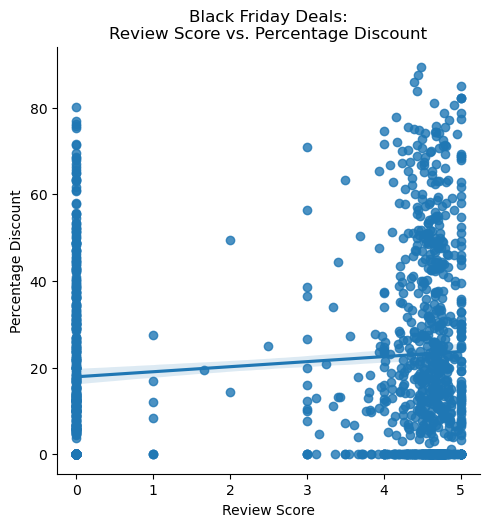

In [202]:
# visualizing in scatter plot for review_score and pct_discount
# for complete dataset
sns.lmplot(data = furniture_df, x = 'review_score', y = 'pct_discount')
plt.title('Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Review Score')
plt.ylabel('Percentage Discount')
plt.show()

In [203]:
# number of products per category for complete dataset
num_cat = """
SELECT category, COUNT(*) AS num_products
FROM furniture_df
GROUP BY category
"""

num_cat = sqldf(num_cat, globals())

num_cat

,category,num_products
0,None,4
1,Baby & Kids,93
2,Bathroom,201
3,Bedroom,108
4,Entry & Mudroom,96
5,Kitchen & Dining,18
6,Lighting,220
7,Living Room,166
8,Office,120
9,Outdoor & Patio,159


In [204]:
# correlation discount-review by CATEGORY - complete dataset
corr_category = (furniture_df.groupby('category').apply(lambda group: group['review_score']\
                .corr(group['pct_discount'])).reset_index(name='discount-review correlation')\
                .round(decimals = 3))
 
# calling result
corr_category

/var/folders/jz/l65kvw9n2ln9h101ztwmvl980000gn/T/ipykernel_65382/3042483089.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_category = (furniture_df.groupby('category').apply(lambda group: group['review_score']\


,category,discount-review correlation
0,Baby & Kids,0.060
1,Bathroom,0.195
2,Bedroom,0.017
3,Entry & Mudroom,0.156
4,Kitchen & Dining,0.156
5,Lighting,0.050
6,Living Room,0.042
7,Office,0.141
8,Outdoor & Patio,0.231
9,Pet,-0.047


/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


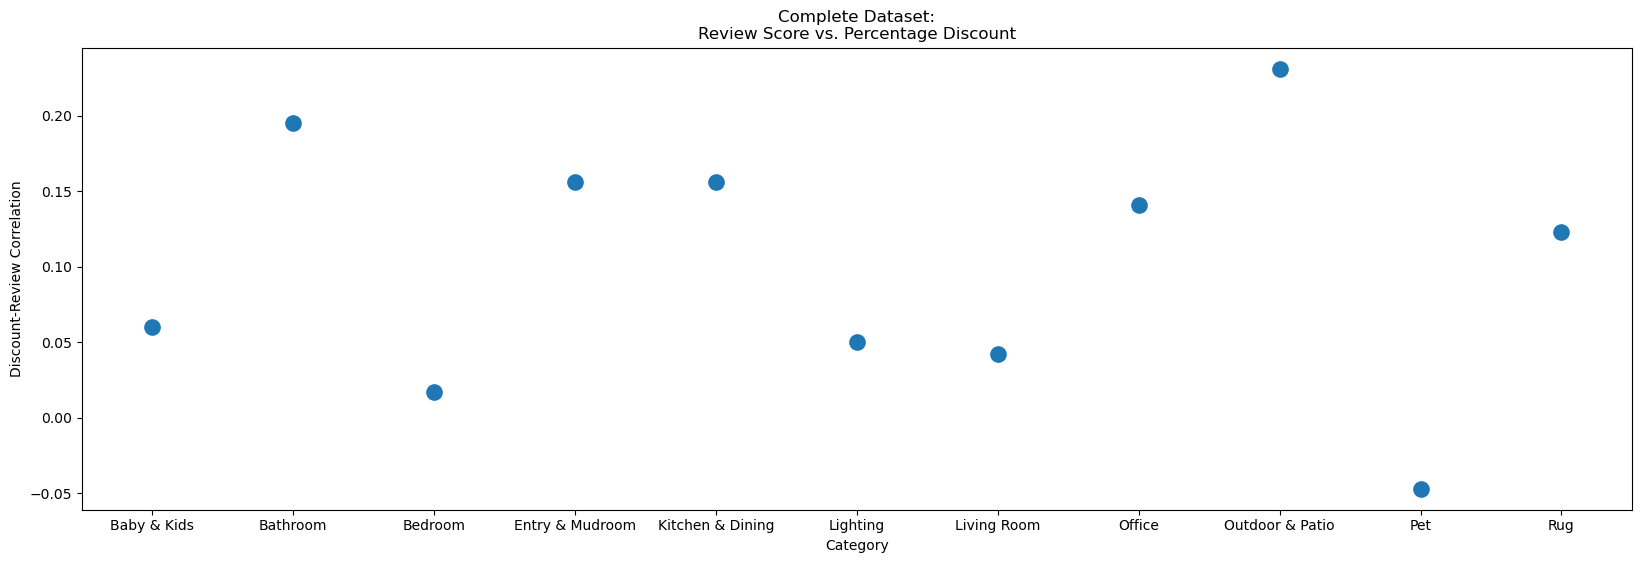

In [205]:
# visualizing a dot plot for the correlation between review_score and pct_discount
# per category for complete dataset

# setting figure size so the every category is visibile
plt.figure(figsize=(20, 6))

# coding dot plot 
sns.stripplot(data = corr_category, x = 'category', y = 'discount-review correlation', size=12)
plt.title('Complete Dataset:\nReview Score vs. Percentage Discount')
plt.xlabel('Category')
plt.ylabel('Discount-Review Correlation')
plt.show()

### Only Black Friday Deals

In [206]:
# calculating correlation between pct_discount and avg_review_score
# for black friday deals using result_bfd
corr_bfd = result_bfd.iloc[:,[8,10]].\
           corr(method = 'pearson', numeric_only=True).round(decimals=3)
 
# calling result
corr_bfd

,pct_discount,review_score
pct_discount,1.000,-0.002
review_score,-0.002,1.000


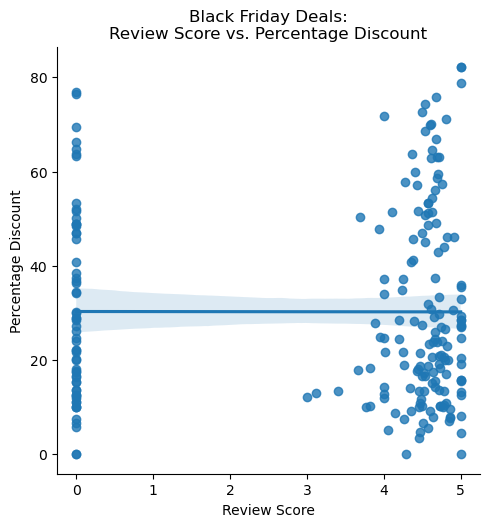

In [207]:
# visualizing in scatter plot of review_score and pct_discout
# for black friday deals
sns.lmplot(data = result_bfd, x = 'review_score', y = 'pct_discount')
plt.title('Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Review Score')
plt.ylabel('Percentage Discount')
plt.show()

In [208]:
# number of products per category for black friday deals
cat_bfd = """
SELECT category, COUNT(*) AS num_products
FROM furniture_df
WHERE black_friday_deal = 1
GROUP BY category
"""

# defining variable for query result
num_cat_bfd = sqldf(cat_bfd, globals())

# calling result
num_cat_bfd

,category,num_products
0,Baby & Kids,19
1,Bathroom,39
2,Bedroom,19
3,Entry & Mudroom,21
4,Kitchen & Dining,2
5,Lighting,29
6,Living Room,24
7,Office,18
8,Outdoor & Patio,27
9,Pet,14


In [209]:
# correlation discount-review by CATEGORY - ONLY BLACK FRIDAY DEALS
corr_category_bfd = (result_bfd.groupby('category').apply(lambda group: group['review_score']\
                     .corr(group['pct_discount'])).reset_index(name='discount-review correlation')\
                     .round(decimals = 3))

# calling result
corr_category_bfd

/var/folders/jz/l65kvw9n2ln9h101ztwmvl980000gn/T/ipykernel_65382/1164159678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_category_bfd = (result_bfd.groupby('category').apply(lambda group: group['review_score']\


,category,discount-review correlation
0,Baby & Kids,0.249
1,Bathroom,0.124
2,Bedroom,-0.312
3,Entry & Mudroom,-0.083
4,Kitchen & Dining,1.000
5,Lighting,-0.176
6,Living Room,0.326
7,Office,0.354
8,Outdoor & Patio,0.170
9,Pet,-0.192


/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


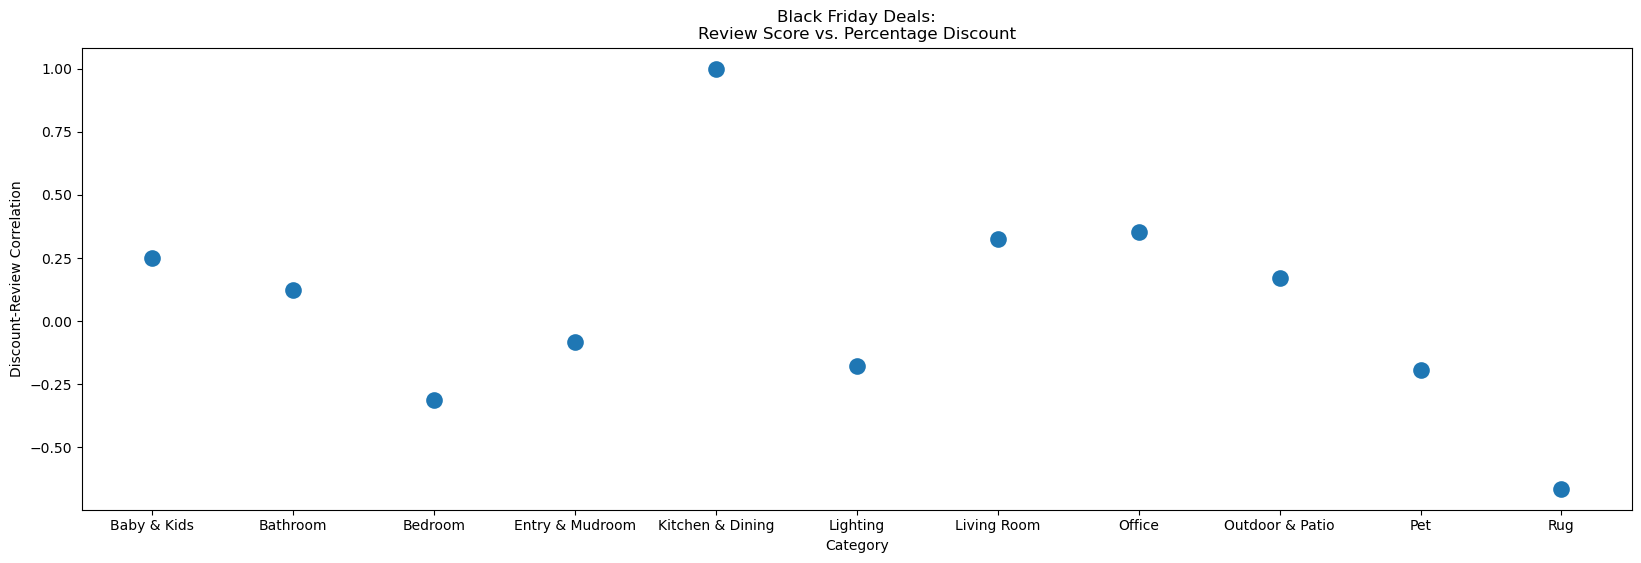

In [210]:
# visualizing a dot plot for the correlation between review_score and pct_discount
# per category for black friday deals

# setting figure size so the every category is visibile
plt.figure(figsize=(20, 6))

# coding dot 
sns.stripplot(data = corr_category_bfd, x = 'category', y = 'discount-review correlation', size=12)
plt.title('Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Category')
plt.ylabel('Discount-Review Correlation')
plt.show()

In [211]:
# querying number of products per subcategory for black friday deals 
num_subcat_bfd = """
SELECT subcategory, COUNT(*) AS num_subcat
FROM furniture_df
WHERE black_friday_deal = 1
GROUP BY subcategory;"""

# defining variable for query result
num_subcat_bfd = sqldf(num_subcat_bfd, globals())

# calling result
num_subcat_bfd

,subcategory,num_subcat
0,Accessories,28
1,Appliances,3
2,Bedding,5
3,Cabinet,6
4,Cat,2
5,Chairs,10
6,Chicken,1
7,Cookware,2
8,Decor,44
9,Dog,9


In [212]:
corr_subcategory_bfd = (result_bfd.groupby('subcategory').apply(lambda group: group['review_score']\
                        .corr(group['pct_discount'])).reset_index(name='discount-review correlation')\
                        .round(decimals = 3))
 
corr_subcategory_bfd

/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/jz/l65kvw9n2ln9h101ztwmvl980000gn/T/ipykernel_65382/2373391821.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This 

,subcategory,discount-review correlation
0,Accessories,0.273
1,Appliances,0.169
2,Bedding,-0.528
3,Cabinet,0.067
4,Cat,NaN
5,Chairs,0.311
6,Chicken,NaN
7,Cookware,-1.000
8,Decor,-0.217
9,Dog,-0.172


/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


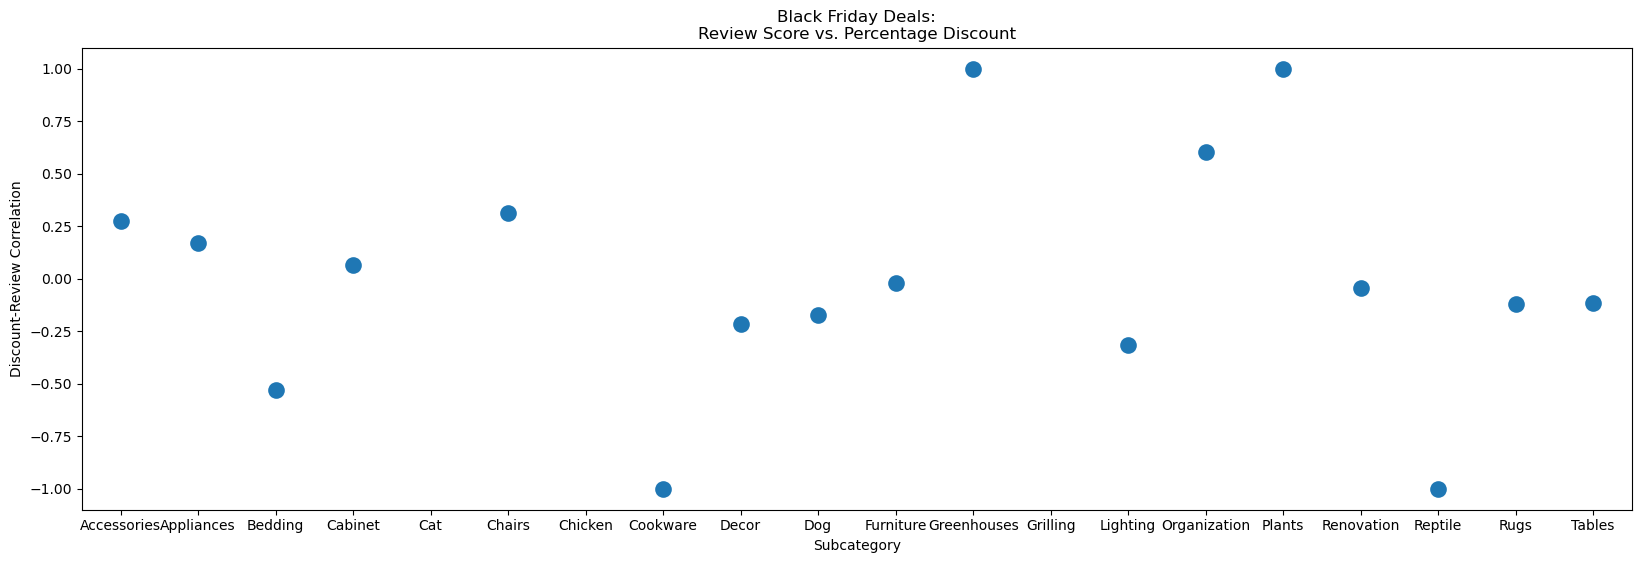

In [213]:
# visualizing a dot plot for the correlation between review_score and pct_discount
# per subcategory for black friday deals

# setting figure size so the every category is visibile
plt.figure(figsize=(20, 6))

# coding dot plot 
sns.stripplot(data = corr_subcategory_bfd, x = 'subcategory', y = 'discount-review correlation', size=12)
plt.title('Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Subcategory')
plt.ylabel('Discount-Review Correlation')
plt.show()

### Calculations for non-Black Friday Deals

In [214]:
# calculating correlation between pct_discount and avg_review_score
# only for non black friday deals using result_nobfd
corr_nobfd = result_nobfd.iloc[:,[8,10]].\
           corr(method = 'pearson', numeric_only=True).round(decimals=3)

# calling result
corr_nobfd

,pct_discount,review_score
pct_discount,1.000,0.126
review_score,0.126,1.000


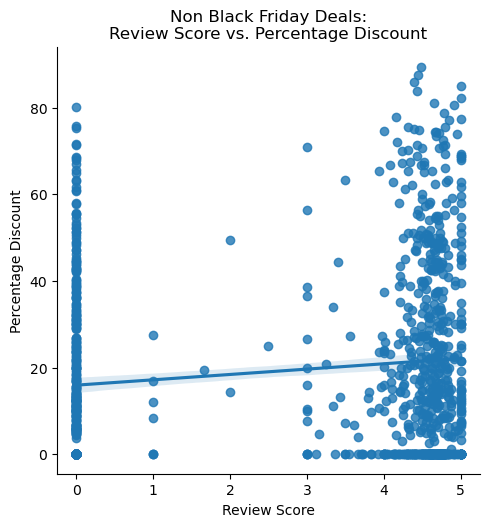

In [215]:
#visualizing in scatter plot between review_score and pct_discount for non black friday deals
sns.lmplot(data = result_nobfd, x = 'review_score', y = 'pct_discount')
plt.title('Non Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Review Score')
plt.ylabel('Percentage Discount')
plt.show()

In [216]:
# querying for number of products per category for non black friday deals
num_per_cat_nobfd = """
SELECT category, COUNT(*) AS num_products
FROM furniture_df
WHERE black_friday_deal = 0
GROUP BY category
"""
# defining variable for result
num_per_cat_nobfd = sqldf(num_per_cat_nobfd, globals())

# calling result
num_per_cat_nobfd

,category,num_products
0,None,4
1,Baby & Kids,74
2,Bathroom,162
3,Bedroom,89
4,Entry & Mudroom,75
5,Kitchen & Dining,16
6,Lighting,191
7,Living Room,142
8,Office,102
9,Outdoor & Patio,132


In [217]:
# correlation discount-review - NON BLACK FRIDAY DEALS
# per category
corr_category_nobfd = (result_nobfd.groupby('category').apply(lambda group: group['review_score']\
                      .corr(group['pct_discount'])).reset_index(name='discount-review correlation')\
                      .round(decimals = 3))

# calling result
corr_category_nobfd

/var/folders/jz/l65kvw9n2ln9h101ztwmvl980000gn/T/ipykernel_65382/1258895484.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_category_nobfd = (result_nobfd.groupby('category').apply(lambda group: group['review_score']\


,category,discount-review correlation
0,Baby & Kids,0.051
1,Bathroom,0.184
2,Bedroom,0.105
3,Entry & Mudroom,0.208
4,Kitchen & Dining,0.136
5,Lighting,0.055
6,Living Room,-0.019
7,Office,0.121
8,Outdoor & Patio,0.237
9,Pet,-0.061


/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


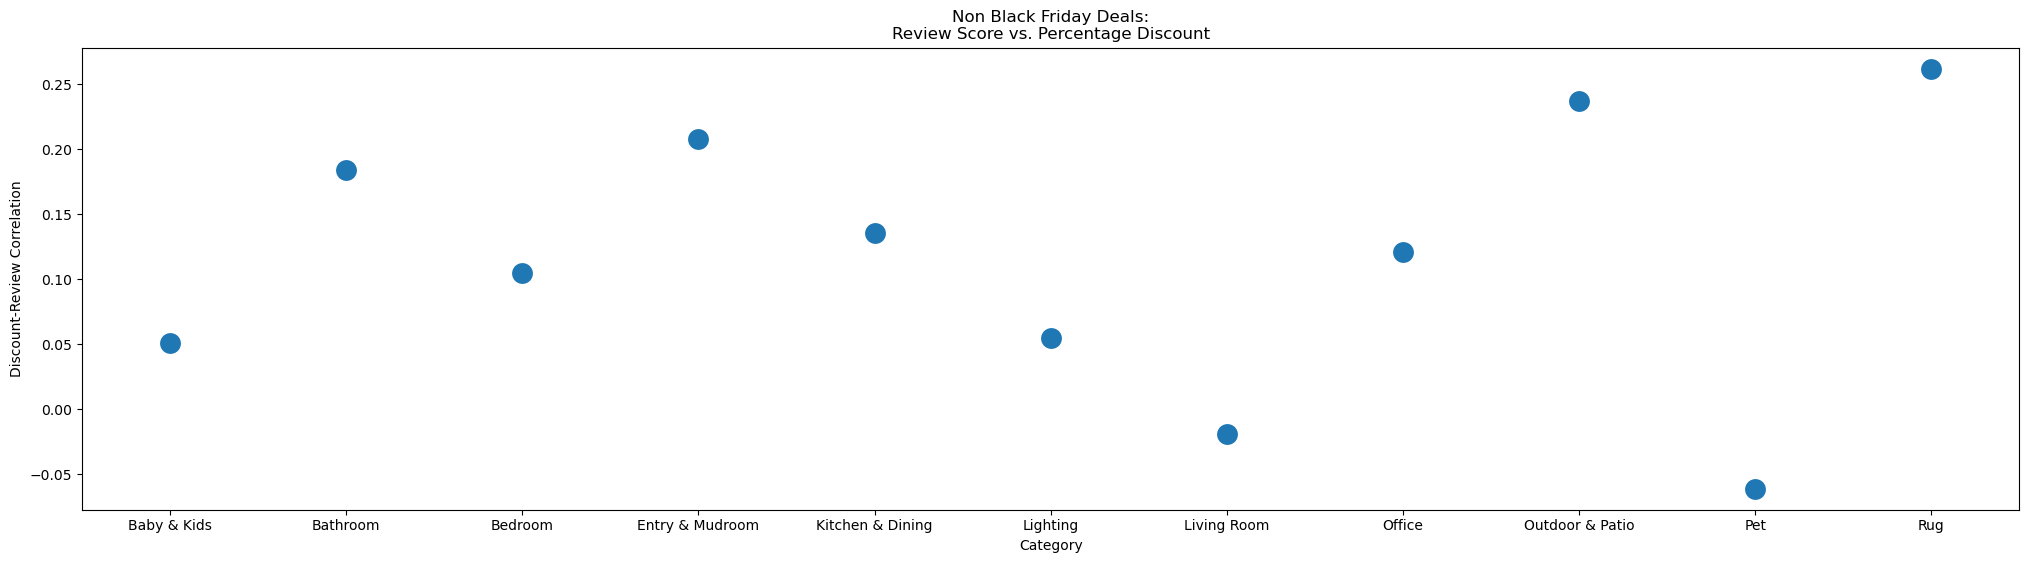

In [218]:
# visualizing a dot plot for the correlation between review_score and pct_discount
# per category for non black friday deals

# setting figure size so the every category is visibile
plt.figure(figsize=(25, 6))

# coding dot plot 
sns.stripplot(data = corr_category_nobfd, x = 'category', y = 'discount-review correlation', size=15)
plt.title('Non Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Category')
plt.ylabel('Discount-Review Correlation')
plt.show()

In [219]:
# querying number of products per subcategory for non black friday deals 
num_subcat_nobfd = """
SELECT subcategory, COUNT(*) AS num_subcat
FROM furniture_df
WHERE black_friday_deal = 0
GROUP BY subcategory;"""

# defining varibale for result
num_subcat_nobfd = sqldf(num_subcat_nobfd, globals())

# calling result
num_subcat_nobfd

,subcategory,num_subcat
0,None,4
1,Accessories,90
2,Activity,8
3,Appliances,19
4,Bedding,36
5,Bird,2
6,Cabinet,18
7,Cat,12
8,Chairs,68
9,Chicken,1


In [220]:
# calculating correlation between review_score and pct_discount
# per subcategory for non black friday deals
corr_subcategory_nobfd = (result_nobfd.groupby('subcategory').apply(lambda group: group['review_score']\
                         .corr(group['pct_discount'])).reset_index(name='discount-review correlation')\
                         .round(decimals = 3))
 
# calling result
corr_subcategory_nobfd

/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/jz/l65kvw9n2ln9h101ztwmvl980000gn/T/ipykernel_65382/438793674.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_subcategory_nobfd = (result_nobfd.groupby('subcategory').ap

,subcategory,discount-review correlation
0,Accessories,0.032
1,Activity,-0.438
2,Appliances,-0.001
3,Bedding,0.046
4,Bird,1.000
5,Cabinet,0.258
6,Cat,-0.290
7,Chairs,0.048
8,Chicken,NaN
9,Cookware,0.245


/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


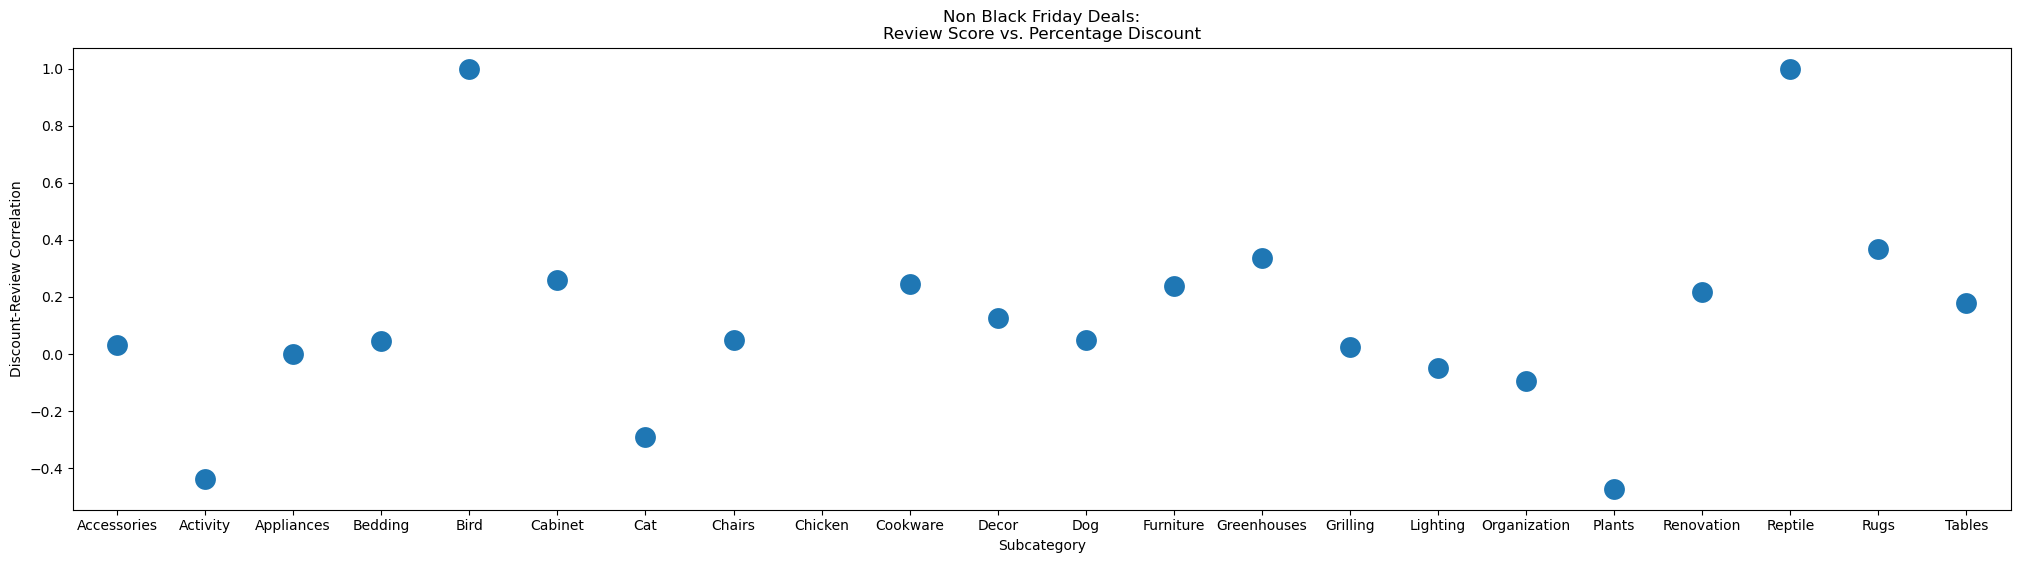

In [221]:
# visualizing a dot plot for the correlation between review_score and pct_discount
# per subcategory for non black friday deals

# setting figure size so the every category is visibile
plt.figure(figsize=(25, 6))

# coding dot plot 
sns.stripplot(data = corr_subcategory_nobfd, x = 'subcategory', y = 'discount-review correlation', size=15)
plt.title('Non Black Friday Deals:\nReview Score vs. Percentage Discount')
plt.xlabel('Subcategory')
plt.ylabel('Discount-Review Correlation')
plt.show()

 -------------------------------------------------------------------------------------------------------------------------------------------<br>
 # Written Analysis<br>
 <br>
First off, it is important to say that Python does not include null values in the calculations. But including products with no review score is essential to calculate a correlation between the review scores and the percentage discounts as this represent the reality. Therefore, all null values for the attributes related to review scores and prices need to be transformed into the value 0.<br>
<br>
There are proportionally less products with no reviews on Black Friday Deal than on the regular sales period (28.5% to 36.5%). Almost 2/3 (66.3%) of products on Black Friday Sale have a customer review score of 4.00 or higher. At the same time, for products on the regular sales period, only 58.2% are rated 4.00 or higher. This means that products on Black Friday sale are more likely to have higher customer review scores. <br>
<br>
The mean and median discounts during the Black Friday Sale are higher than during a regular sales period, meaning the Black Friday Sale makes a difference in percentage discounts. Though, the correlation analysis between customer review scores and percentage discounts gives a correlation coefficient of -0.002. This means there is no relationship between these two attributes. As a comparison, the correlation analysis between these attributes for products not included in the Black Friday Sale shows a weak positive relationship with a correlation coefficient of 0.126. Consequently, there has to be some other systematic behind the product selection for Black Friday Sale other than the customer review score.<br>
<br>
The scatter plots show the difference in the correlation between customer review scores and percentage discounts Black Friday Deals and non Black Friday Deals well. The dot plots highlight the difference in correlation for these two attributes per category and subcategory.<br>
<br>
The correlation analysis for the two mentioned attributes across categories and subcategories shows that there are differences for products not on Black Friday Sale. Though, for Black Friday Deals, the sample size is too small to conduct a statistically viable calculation for every category and subcategory, aiming for a size of at least 30 samples each. The subcategory "Decor" and "Furniture" are the only ones with a sample size big enough, showing a correlation between customer review scores and percentage discounts of -0.217 and -0.019, indicating a weak negative and no relationship. Nonetheless, these results open the possibility that these differences could occur amongst all Black Friday Deals as well. To test this hypothesis, a larger sample is needed.  

-------------------------------------------------------------------------------------------------------------------------------------------<br>
# Conclusion

The analysis shows that there is no correlation between customer review scores and the percentage discounts during the Black Friday Sale. Conversely, products that are not included in the Black Friday Sale show a weak positive relationship between these attributes. Further analyses show that this correlation can differ across other attributes, for example categories and subcategories. For the products included in the Black Friday Sale, the sample size per category, subcategory, and other attributes is too small to calculate a viable statistical result, taking 30 values per attribute as a threshold. But differences are seen for products not included in the Black Friday Sale. This indicates that this phenomenon could potentially be seen for Black Friday Deals as well. To test these hypotheses, a larger sample size is needed. 